# Préstamos#

*Los préstamos son operaciones financieras, por las que se cede una cantidad de dinero, que será devuelta junto con los intereses a un determinado plazo. Suelen ir acompañados de costes adicionales como gastos y comisiones*

**Tipos de Préstamos**

**Préstamo Fránces** *Se caracteriza por el pago de una cuota constante, compuesta por los intereses del capital pendiente más una cantidad destinada a la amortización del préstamo. Es el sistema más utilizado en el sistema bancario actual.*


*¿Qué necesitamos para poder calcular un préstamo francés?*

*En primer lugar, necesitamos conocer la cuota constante del préstamo. Para ello podemos utilizar la fórmula numpy financiero PMT que se corresponde a la fórmula de PAGO en Excel*

*Después calcularemos los intereses, multiplicando el capital pendiente por el tipo de interes*

*Finalmente, a la cuota obtenida mediante la fórmula PMT (PAGO en Excel) restaremos los intereses, y será la cuota de amortización. Con esto, finalizaremos el primer plazo, repitiendo la operación a lo largo de los periodos que dure el préstamo.*

*Vamos a ver un ejemplo, y para ello, lo primero que vamos a hacer es importar las librerías que vamos a utilizar en este documento*

In [134]:
pip install numpy-financial

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy_financial as npf
import numpy as np
import tabulate as tab
import matplotlib.pyplot as plt

*Préstamo de 100.000 euros, a devolver en 10 años a un 5% de interes*

In [3]:
#en primer lugar vamos a calcular la cuota constante

C0 = 100000
n = 5
tasa = 0.07

pago = npf.pmt(rate=tasa, nper=n, pv=-C0, fv=0, when='end')
print(round(pago,2))

24389.07


In [4]:
#Vamos a calcular el capital pendiente de cada periodo

pendiente = [C0]

for i in range(1,n+1,1):
    c = npf.fv(rate=tasa, nper =i, pmt = pago, pv= -C0)
    pendiente.append(c)


print(pendiente)

[100000, 82610.93055586258, 64004.626250635585, 44095.880644042685, 22793.522844988227, -0.0]


In [5]:
#Calculamos la amortización de cada año

amortz = [0]

for i in range(1,n+1,1):
    b = npf.ppmt(rate=tasa, per=i, nper=n, pv=-C0, fv=0, when='end')
    amortz.append(b)
print(amortz)



[0, 17389.069444137396, 18606.304305227015, 19908.745606592904, 21302.357799054407, 22793.52284498822]


In [6]:
#Calculamos los intereses de cada periodo
inter = [0]

for i in range(1,n+1,1):
    d = npf.ipmt(rate=tasa, per=i, nper=n, pv=-C0, fv=0, when='end')
    inter.append(d)

inter

[0,
 array(7000.),
 array(5782.76513891),
 array(4480.32383754),
 array(3086.71164508),
 array(1595.54659915)]

In [7]:
#Comprobamos

amortz = np.array(amortz)

comprob = np.array(amortz + inter)
print(comprob)

[    0.         24389.06944414 24389.06944414 24389.06944414
 24389.06944414 24389.06944414]


In [8]:
#Hacemos un cuadro de amortización para ver los datos con la librería tabulate
datos =[]
saldo = C0
saldo2 = 0
linea1 = [0,0,0,0,C0,0]
datos.append(linea1)

Anualidad = npf.pmt(rate=tasa, nper=n, pv=-C0, fv=0, when='end')

for i in range(1, n+1):
    pago_capital = npf.ppmt(rate=tasa, per=i, nper=n, pv=-C0, fv=0, when='end')
    pago_int = Anualidad - pago_capital
    saldo -= pago_capital
    saldo2 += pago_capital
    
    linea = [i, format(Anualidad, '.0f'),  format(pago_int, '.0f'), 
             format(pago_capital, '.0f'), format(saldo, '.0f'), format(saldo2, '.0f')]
    
    datos.append(linea)
    
print(tab.tabulate(datos, headers= ['Periodo', 'Anualidad', 'Intereses',
                                    'Amortización','Capital Vivo','Capital Amortizado'], 
                   tablefmt = 'psql'))
    

+-----------+-------------+-------------+----------------+----------------+----------------------+
|   Periodo |   Anualidad |   Intereses |   Amortización |   Capital Vivo |   Capital Amortizado |
|-----------+-------------+-------------+----------------+----------------+----------------------|
|         0 |           0 |           0 |              0 |         100000 |                    0 |
|         1 |       24389 |        7000 |          17389 |          82611 |                17389 |
|         2 |       24389 |        5783 |          18606 |          64005 |                35995 |
|         3 |       24389 |        4480 |          19909 |          44096 |                55904 |
|         4 |       24389 |        3087 |          21302 |          22794 |                77206 |
|         5 |       24389 |        1596 |          22794 |              0 |               100000 |
+-----------+-------------+-------------+----------------+----------------+----------------------+


[]

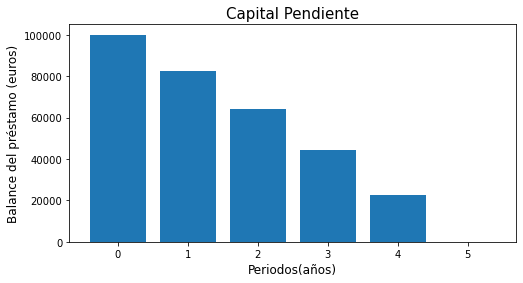

In [9]:
#Comprobemos como evoluciona nuestro prestamo en la siguiente gráfica

plt.figure(figsize = (8, 4))
plt.bar(range(0, n + 1), pendiente)
plt.title("Capital Pendiente", fontsize = 15)
plt.xlabel("Periodos(años)", fontsize = 12)
plt.ylabel("Balance del préstamo (euros)", fontsize = 12)
plt.plot()

[]

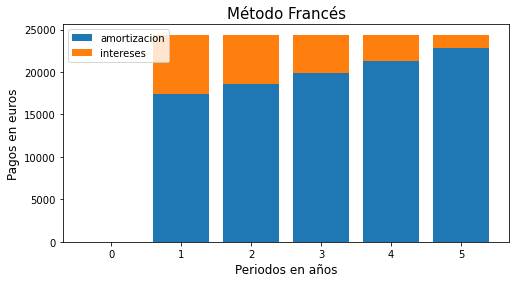

In [10]:
#Comprobemos como evolucionan los intereses de nuestro prestamo en la siguiente gráfica

plt.figure(figsize = (8, 4))
plt.bar(range(0, n+1 ), amortz, label = 'amortizacion')
plt.bar(range(0, n +1), inter, bottom= amortz, label='intereses')
plt.legend(fontsize = 10)
plt.title("Método Francés", fontsize = 15)
plt.xlabel("Periodos en años", fontsize = 12)
plt.ylabel("Pagos en euros", fontsize = 12)
plt.plot()

*En la gráfica podemos comprobar como al principio del préstamo se pagan casi más intereses que amortización, sin embargo al final del préstamo, se paga más amortización que intereses.*

**Préstamo Americano** *Se caracteriza por pagar tan solo intereses a lo largo de la vida del préstamo, amortizando todo el capital al final del periodo*

*Veamos un ejemplo*

*C0 = 100.000, n = 5, tasa = 0.07*

In [11]:
C0 = 100000
n = 5
tasa = 0.07

#La cuota serán los intereses del capital pendiente:

pago = round(C0*tasa,2)
print(pago)

7000.0


In [12]:
#La Amortización anual será cero

amortz = 0
print(amortz)

0


In [13]:
#Vamos a ver el cuadro de amortización

datos =[]
saldo = C0
saldo2 = 0
linea1 = [0,0,0,0,C0,0]
datos.append(linea1)

Anualidad = pago

for i in range(1, 5):
    pago_capital = 0
    pago_int = pago
    
    saldo2 += 0
    
    linea = [i, format(Anualidad, '.0f'),  format(pago_int, '.0f'), 
             format(pago_capital, '.0f'), format(saldo, '.0f'), format(saldo2, '.0f')]
    
    datos.append(linea)
    
linea2 = [5,pago+C0,pago,C0,0,C0]
datos.append(linea2)
    
print(tab.tabulate(datos, headers= ['Periodo', 'Anualidad', 'Intereses', 
                                    'Amortización','Capital Vivo','Capital Amortizado'], tablefmt = 'psql'))
    

+-----------+-------------+-------------+----------------+----------------+----------------------+
|   Periodo |   Anualidad |   Intereses |   Amortización |   Capital Vivo |   Capital Amortizado |
|-----------+-------------+-------------+----------------+----------------+----------------------|
|         0 |           0 |           0 |              0 |         100000 |                    0 |
|         1 |        7000 |        7000 |              0 |         100000 |                    0 |
|         2 |        7000 |        7000 |              0 |         100000 |                    0 |
|         3 |        7000 |        7000 |              0 |         100000 |                    0 |
|         4 |        7000 |        7000 |              0 |         100000 |                    0 |
|         5 |      107000 |        7000 |         100000 |              0 |               100000 |
+-----------+-------------+-------------+----------------+----------------+----------------------+


In [14]:
Amortz = [0,0,0,0,0,100000]
inter = [0,7000,7000,7000,7000,7000]

[]

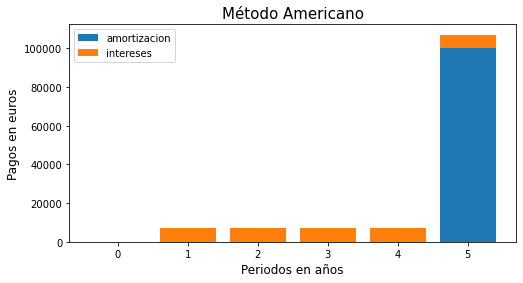

In [15]:
#Comprobemos como evolucionan los intereses de nuestro prestamo en la siguiente gráfica

plt.figure(figsize = (8, 4))
plt.bar(range(0, n+1 ), Amortz, label = 'amortizacion')
plt.bar(range(0, n+1 ), inter, bottom= Amortz, label='intereses')
plt.legend(fontsize = 10)
plt.title("Método Americano", fontsize = 15)
plt.xlabel("Periodos en años", fontsize = 12)
plt.ylabel("Pagos en euros", fontsize = 12)
plt.plot()

**Préstamo Italiano** *Se caracteriza por tener una cuota de amortización constante, siendo la cuota variable a lo largo del periodo*

*Veamos un ejemplo*

*Capital = 100.000, años = 4 y tasa = 19%*

In [16]:
#Calculemos en primer lugar las amortizaciones

C0 = 100000
n = 5
tasa = 0.10
Amortz = [0]

for i in range(1,n+1):
    b = C0/n
    Amortz.append(b)
print(Amortz)

[0, 20000.0, 20000.0, 20000.0, 20000.0, 20000.0]


In [17]:
#Después calculamos los intereses

pend = C0
inter = [0]

for i in range(1,n+1):
    a = pend * tasa
    inter.append(a)
    pend -= C0/n

print(inter)

[0, 10000.0, 8000.0, 6000.0, 4000.0, 2000.0]


In [18]:
#Ya podemos hacer nuestro cuadro de amortización

datos =[]
saldo = C0
saldo2 = 0
linea1 = [0,0,0,0,C0,0]
datos.append(linea1)

for i in range(1, n+1):
    pago_capital = C0/n
    pago_int = saldo*tasa
    saldo -= pago_capital
    saldo2 += pago_capital
    Anualidad = pago_capital + pago_int
    linea = [i, format(Anualidad, '.0f'),  format(pago_int, '.0f'), format(pago_capital, '.0f'), format(saldo, '.0f'), format(saldo2, '.0f')]
    datos.append(linea)
    
print(tab.tabulate(datos, headers= ['Periodo', 'Anualidad', 'Intereses', 'Amortización','Capital Vivo','Capital Amortizado'], tablefmt = 'psql'))
    

+-----------+-------------+-------------+----------------+----------------+----------------------+
|   Periodo |   Anualidad |   Intereses |   Amortización |   Capital Vivo |   Capital Amortizado |
|-----------+-------------+-------------+----------------+----------------+----------------------|
|         0 |           0 |           0 |              0 |         100000 |                    0 |
|         1 |       30000 |       10000 |          20000 |          80000 |                20000 |
|         2 |       28000 |        8000 |          20000 |          60000 |                40000 |
|         3 |       26000 |        6000 |          20000 |          40000 |                60000 |
|         4 |       24000 |        4000 |          20000 |          20000 |                80000 |
|         5 |       22000 |        2000 |          20000 |              0 |               100000 |
+-----------+-------------+-------------+----------------+----------------+----------------------+


[]

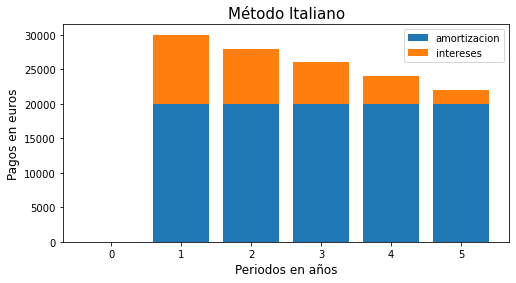

In [19]:
#Comprobemos como evolucionan los intereses de nuestro prestamo en la siguiente gráfica

plt.figure(figsize = (8, 4))
plt.bar(range(0, n+1 ), Amortz, label = 'amortizacion')
plt.bar(range(0, n+1 ), inter, bottom= Amortz, label='intereses')
plt.legend(fontsize = 10)
plt.title("Método Italiano", fontsize = 15)
plt.xlabel("Periodos en años", fontsize = 12)
plt.ylabel("Pagos en euros", fontsize = 12)
plt.plot()